In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [9]:
classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

root = '../dataset/'
json_file = root + 'train.json'
coco = COCO(json_file)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [38]:
def load_image_id(coco):
    total_image_ids = coco.getImgIds()
    image_ids = []
    for i in total_image_ids:
        anno_ids = coco.getAnnIds(imgIds=i)
        if len(anno_ids) != 0:
            image_ids.append(i)
    return image_ids


def load_image(coco, img_idx, image_ids):
    global root 
    image_info = coco.loadImgs(image_ids[img_idx])[0]
    img = cv2.imread(os.path.join(root, image_info['file_name']))
    return img, image_info['width'], image_info['height']

def load_annotations(coco, img_idx, image_ids):
    global classes
    anno_ids = coco.getAnnIds(imgIds=image_ids[img_idx])
    bboxes, labels = [], []
    if len(anno_ids) == 0:
        return bboxes, labels
    loaded_anno = coco.loadAnns(anno_ids)
    for i, anno in enumerate(loaded_anno):
        if anno['bbox'][2] <= 0 or anno['bbox'][3] <= 0: # w,h 최소 길이 지정해 보았음
            continue
        bbox = anno['bbox']
        bboxes.append([bbox[0],bbox[1], bbox[0] +bbox[2], bbox[1] + bbox[3]])
        labels.append(anno['category_id'])
        #labels.append(classes[anno['category_id']])
    return bboxes, labels
image_ids = load_image_id(coco)

{0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}


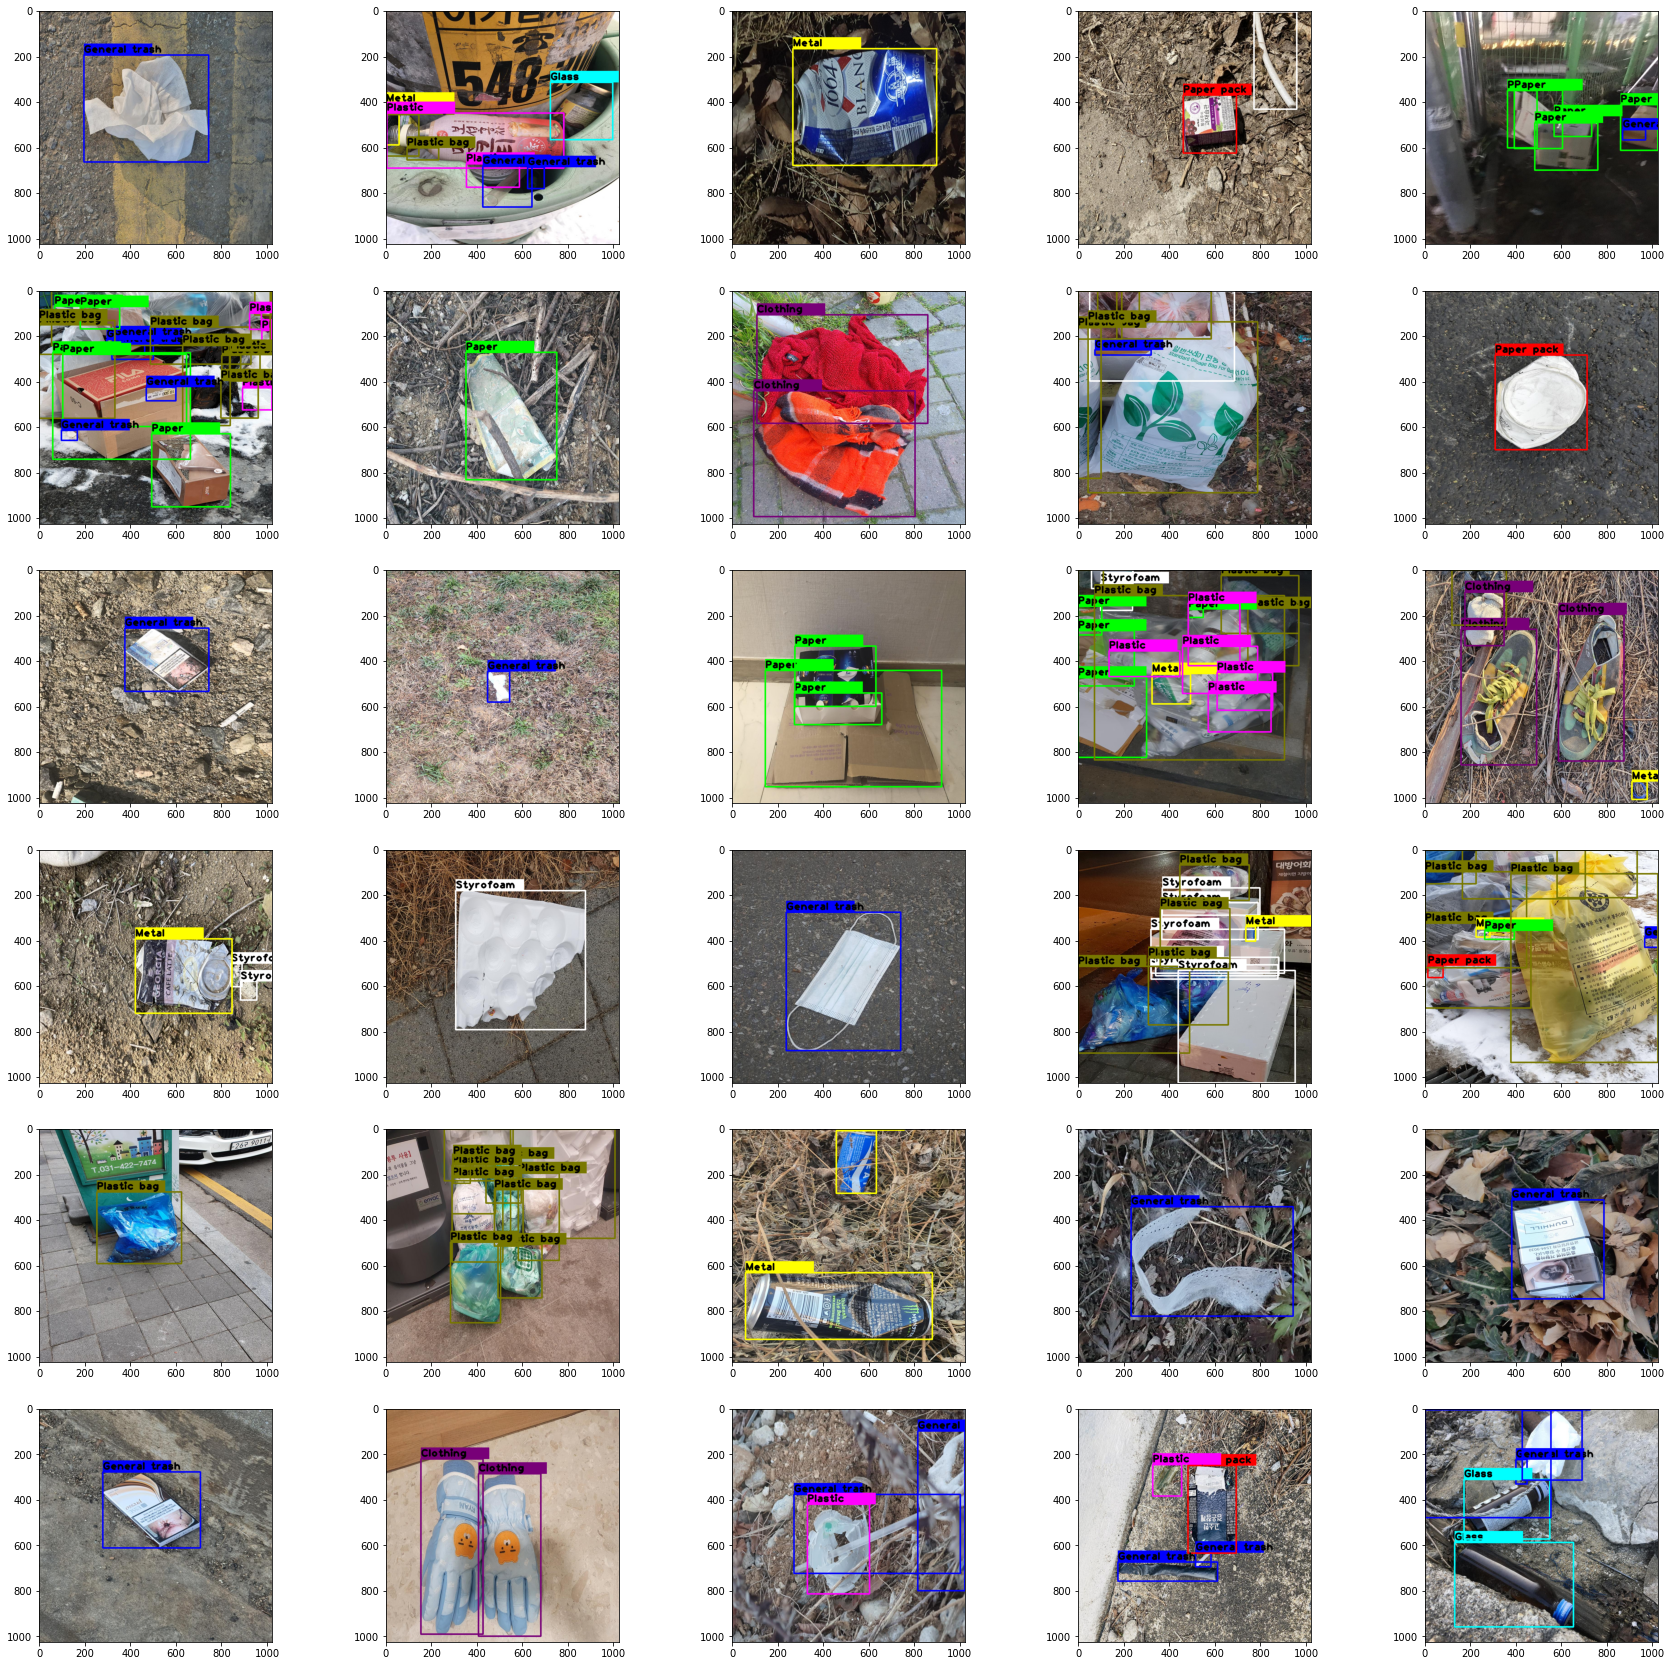

In [40]:
dict_c = {i:v for i,v in enumerate(classes)}
print(dict_c)
color_list = [(0,0,255),(0,255,0),(255,0,0),(255,255,0),(0,255,255),(255,0,255),(255,255,255),(120,120,0),(0,120,120),(120,0,120)]

w_num, h_num = 5, 6
plt.figure(figsize=(w_num*6,h_num*5))
for j in range(30):
    img = load_image(coco, j, image_ids)[0]
    #img = cv2.resize(img, (512,512), interpolation = cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bboxes, labels = load_annotations(coco, j, image_ids)
    for i in range(len(bboxes)):
        bbox = list(map(int,bboxes[i]))
        label = labels[i]
        cv2.rectangle(img, (bbox[0],bbox[1]- 50),(bbox[0]+300,bbox[1]), color_list[label], -1)
        cv2.rectangle(img, (bbox[0],bbox[1]),(bbox[2],bbox[3]), color_list[label],5)
        cv2.putText(img, dict_c[label], (bbox[0],bbox[1]-10), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,0), 5, cv2.LINE_AA)
    plt.subplot(h_num, w_num, j+1)
    plt.imshow(img)
plt.show()